In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df['Unnamed: 0'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# checking the distribution of the continuous value of the integer type columns

# plt.figure(figsize=(15,12),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
        plotnumber+=1
plt.show()

# checking for the distribution of the continuous feature individually:

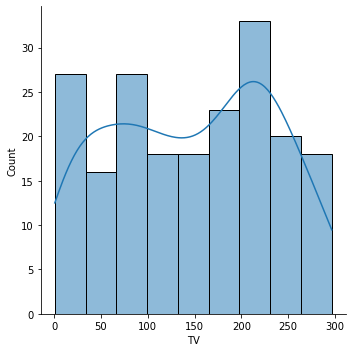

In [9]:
sns.displot(df['TV'],kde=True)

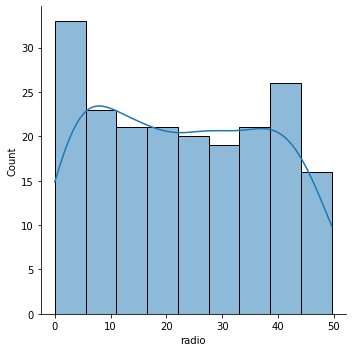

In [10]:
sns.displot(df['radio'],kde=True)

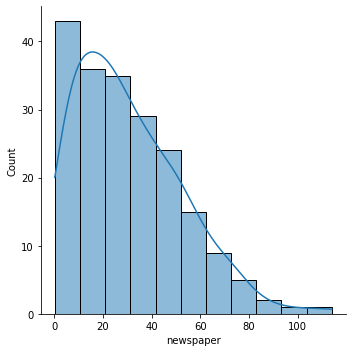

In [11]:
sns.displot(df['newspaper'],kde=True)

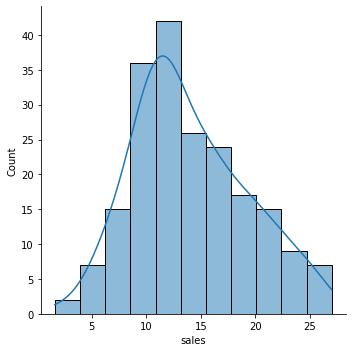

In [12]:
sns.displot(df['sales'],kde=True)

In [13]:
df_feature=df[['TV','radio','newspaper']]
df_target=df['sales']

# checking for the relationship of the columns with the target variable:

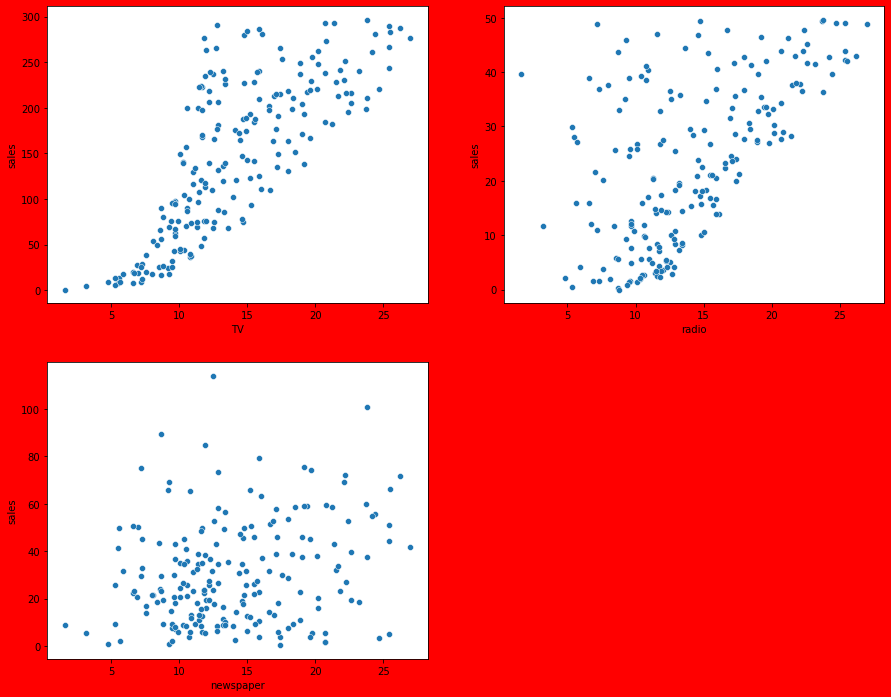

In [14]:
plt.figure(figsize=(15,12),facecolor='red')
plotnumber=1

for column in df_feature:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(df_target,df_feature[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('sales',fontsize=10)
        
        plotnumber+=1
plt.show()

# Data cleansing and outliers analysis:

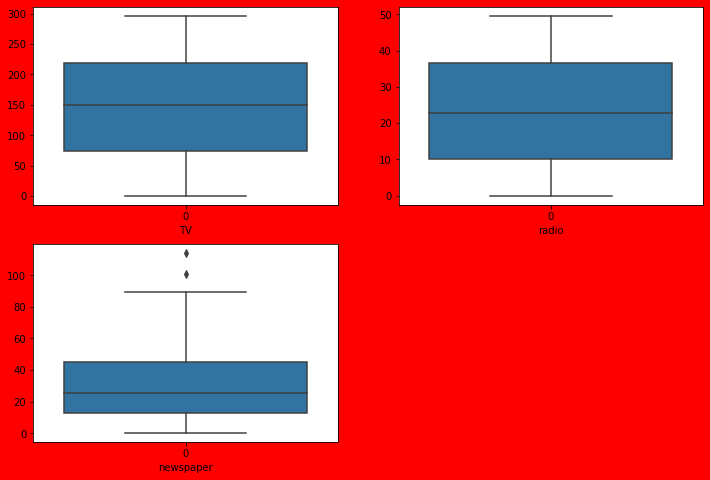

In [15]:
plt.figure(figsize=(12,8),facecolor='red')
plotnumber=1

for column in df_feature:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=10)
        
        plotnumber+=1
plt.show()

# Exploratory Data analysis - Univariate Analysis - Sales is the target variable

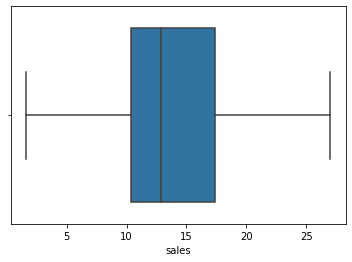

In [16]:
sns.boxplot(df['sales'])
plt.show()

# Heatmap : showing correlation between different variables

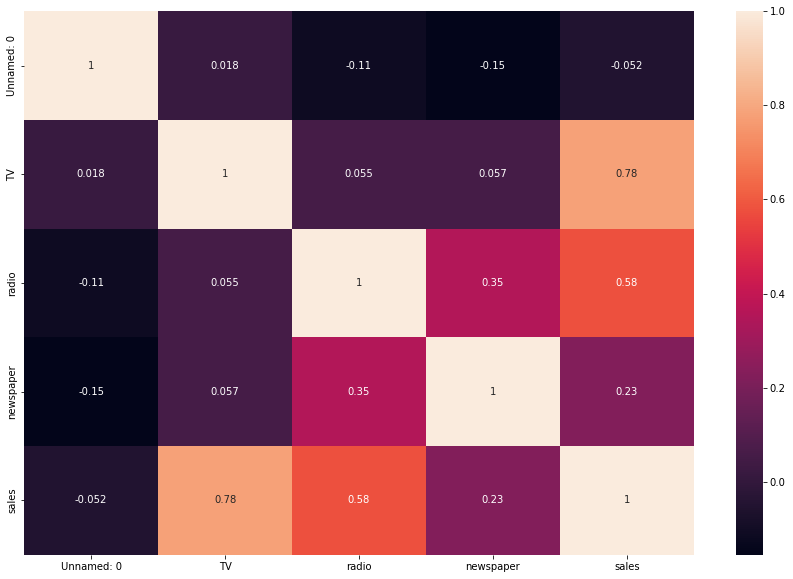

In [17]:
df_corr=df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True, annot_kws={'size':10})
plt.show()

# Standardizing the data:

In [18]:
x=df.drop(['sales'],axis=1)
y=df['sales']

In [19]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Train Test split:

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=21)

# LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

print intercept and coefficient

In [23]:
print('Intercept :',lm.intercept_)
print('TV :',lm.coef_[0])
print('Radio :',lm.coef_[1])
print('newspaper :',lm.coef_[2])

Intercept : 3.005209420097856
TV : -0.0005798278087352455
Radio : 0.04577591959744513
newspaper : 0.1883831759769334


how do we interpret these coefficients? if we look at the coefficients for the newspaper spending is negative. it means that the money spent for the newspaper advertising is not contributing in a positive way to the sales

In [24]:
import statsmodels.formula.api as smf

In [25]:
lm = smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        22:45:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-values for TV $ radio: 

0.000<0.05
rejecting null hypothesi (null hypothesis : there is no relationship between feature and the target variable)

p-values for newspaper:

0.860>0.05

failed to reject the null hypothesis(i.e., there is no relationship between newspaper advertising and sales)

# only include TV and radio in the model

In [26]:
lm = smf.ols(formula='sales~TV+radio',data=df).fit()
lm.rsquared

0.8971942610828956

# ADD newpaper to the model(which we believe has no contribution with sales)

In [27]:
lm = smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.rsquared

0.8972106381789522

here, is the prove that the newspaper is not at all contributing to target sales

In [28]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

# Let's check how well model fits on train data:

Adjusted R2 score

In [29]:
reg.score(X_train,y_train)

0.8890540600770627

# Let's check how well model fit on test data:

In [30]:
reg.score(X_test,y_test)

0.9146569039385175

Let's plot and visualize:

In [31]:
y_pred=reg.predict(X_test)

In [32]:
y_pred

array([ 9.80715223, 12.79435145, 23.47066183, 18.28862285, 15.28338061,
       11.96212534, 20.79824115,  4.3473287 ,  7.61784753, 23.78867513,
       14.96143908, 21.8641487 , 17.81709528,  9.48760649, 15.50179354,
       16.17108079, 19.25610515, 19.09752875, 23.10206266,  9.04613718,
        3.38772813, 11.70614079, 16.52957307, 23.38096234,  8.03775943,
        3.97694102, 16.18109786,  6.39767188, 12.45300465, 15.39110471,
       14.39301684,  8.48188414, 23.08991937,  6.55489212, 17.62555955,
        5.73807326, 11.27267409, 16.85353765,  9.54015199, 20.55652972])

plotting scatterplot between actual Vs predicted sales

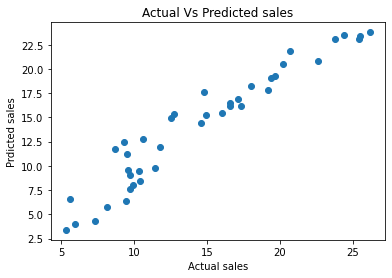

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual sales")
plt.ylabel("Prdicted sales")
plt.title("Actual Vs Predicted sales")
plt.show()

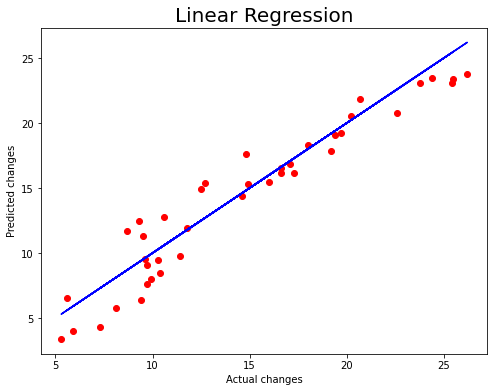

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual changes",fontsize=10)
plt.ylabel("Predicted changes",fontsize=10)
plt.title("Linear Regression",fontsize=20)
plt.savefig("lr.png")
plt.show()

In [35]:
from sklearn.linear_model import Lasso

In [36]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],
           'random_state':list(range(0,10))}

In [37]:
from sklearn.model_selection import GridSearchCV
ls=Lasso()

lf=GridSearchCV(ls,parameters)
lf.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [38]:
print(lf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [39]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(X_train,y_train)
ls_score_training=ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

In [40]:
ls_score_training*100

88.77083154768277

In [41]:
pred_ls=ls.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
lss=r2_score(y_test,pred_ls)

In [44]:
lss*100

92.0528139166407

# we'll go for the lasso model as it will give the best score 92.05%

In [45]:
import pickle
filename='advertising.pkl'
pickle.dump(ls,open(filename,'wb'))

# Conclusion:

In [46]:
loaded_model=pickle.load(open('advertising.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

92.0528139166407


In [48]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_ls[:]],index=['Predicted','Original'])

In [49]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,10.046934,12.690036,23.111414,18.098027,15.1604,11.817738,20.516774,4.659997,7.913144,23.747242,...,14.207752,8.762448,22.905135,6.710323,17.52834,5.920486,11.309674,16.977597,9.693762,20.236953
Original,10.046934,12.690036,23.111414,18.098027,15.1604,11.817738,20.516774,4.659997,7.913144,23.747242,...,14.207752,8.762448,22.905135,6.710323,17.52834,5.920486,11.309674,16.977597,9.693762,20.236953
